In [1]:
from sympy import *
init_printing()

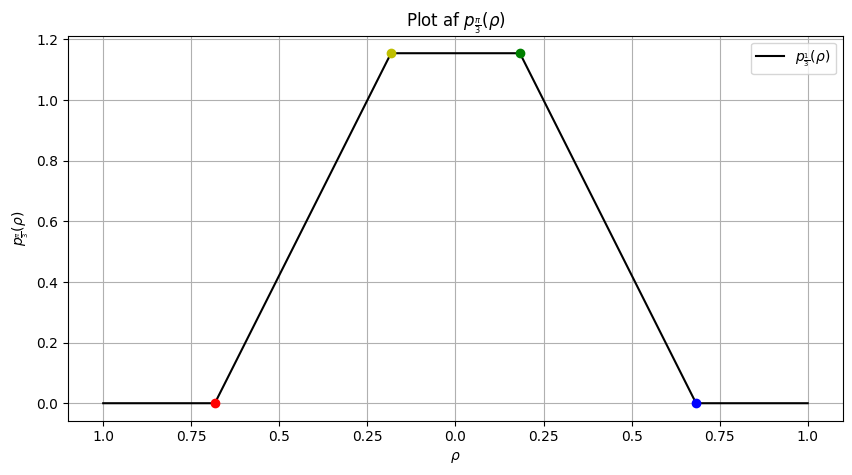

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function definition
def p_one_third(rho):
    if abs(rho) > 0.5 * np.sin(np.pi/3) + 0.5 * np.cos(np.pi/3):
        return 0
    elif abs(rho) >= 0.5 * np.sin(np.pi/3) - 0.5 * np.cos(np.pi/3):
        return 2/3 *np.sqrt( (np.sqrt(3) * (abs(rho) - 0.25) - 0.75)**2 + 9 *(-abs(rho) + 0.25 + 0.25* np.sqrt(3))**2)
    elif abs(rho) >= 0:
        return 2 / np.sqrt(3)
    else:
        return 0

# Generating values for rho
rho_values = np.linspace(-1, 1, 400)  # from 0 to 1.5 for a good coverage
p_values = np.array([p_one_third(rho) for rho in rho_values])

# Plotting the function
plt.figure(figsize=(10, 5))
plt.plot(rho_values, p_values, label=r'$p_{\frac{1}{3}}(\rho)$',c='black')
plt.title('Plot af $p_{\\frac{\\pi}{3}}(\\rho)$')
plt.xlabel('$\\rho$')
plt.ylabel('$p_{\\frac{\\pi}{3}}(\\rho)$')
plt.grid(True)
plt.legend()
plt.plot(0.5 * np.sin(np.pi/3) + 0.5 * np.cos(np.pi/3), p_one_third(0.5 * np.sin(np.pi/3) + 0.5 * np.cos(np.pi/3)), 'bo')
plt.plot(-0.5 * np.sin(np.pi/3) - 0.5 * np.cos(np.pi/3), p_one_third(-0.5 * np.sin(np.pi/3) - 0.5 * np.cos(np.pi/3)), 'ro')
plt.plot(0.5 * np.sin(np.pi/3) - 0.5 * np.cos(np.pi/3), p_one_third(0.5 * np.sin(np.pi/3) - 0.5 * np.cos(np.pi/3)), 'go')
plt.plot(-0.5 * np.sin(np.pi/3) + 0.5 * np.cos(np.pi/3), p_one_third(-0.5 * np.sin(np.pi/3) + 0.5 * np.cos(np.pi/3)), 'yo')
formatter = FuncFormatter(lambda x, _: f'{abs(x)}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


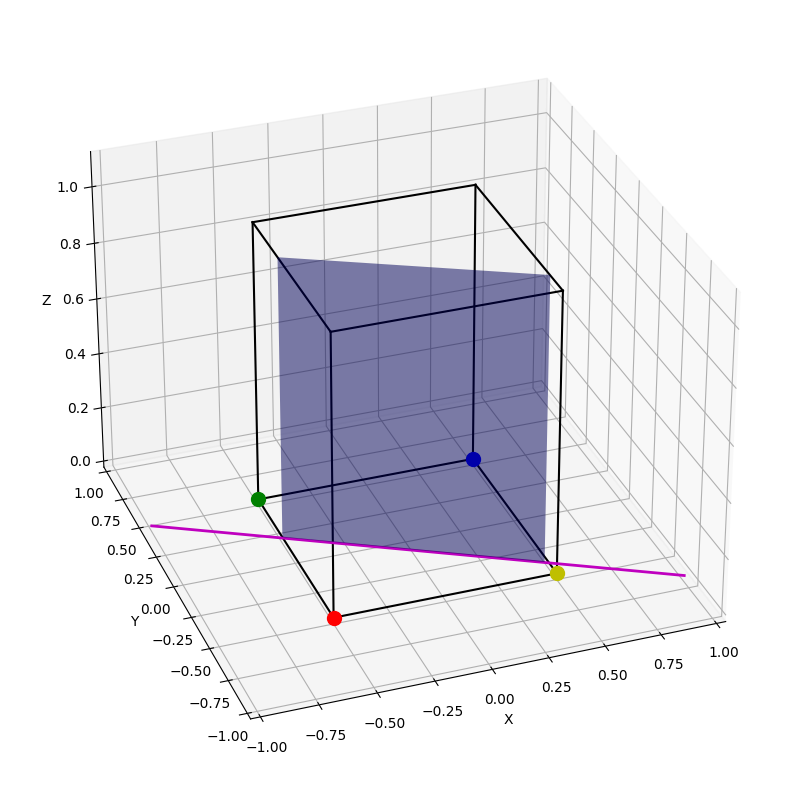

In [9]:
# Redrawing the box, line (without label), and transparent plane without the line's label
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Coordinates for the bottom points of the box
x = [-0.5, 0.5, 0.5, -0.5]
y = [-0.5, -0.5, 0.5, 0.5]
z = [0, 0, 0, 0]

# Colors for each point
colors = ['r', 'y', 'b', 'g']

# Plotting each point with a different color
for i in range(len(x)):
    ax.scatter(x[i], y[i], z[i], color=colors[i], s=100)

# Drawing lines between points at the bottom of the box
for i in range(len(x)):
    ax.plot([x[i], x[(i+1)%4]], [y[i], y[(i+1)%4]], [z[i], z[(i+1)%4]], color='k')

# Drawing vertical lines to create sides of the box (height = 1)
height = 1
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y[i]], [z[i], z[i]+height], color='k')

# Completing the top of the box
for i in range(len(x)):
    ax.plot([x[i], x[(i+1)%4]], [y[i], y[(i+1)%4]], [z[i]+height, z[(i+1)%4]+height], color='k')

# Line through specified points, extending outside the box, without label
line_x = [-1, 1]
line_y = [0.45, -0.7]
line_z = [0, 0]
ax.plot(line_x, line_y, line_z, color='m', linewidth=2)

# Specified transparent plane
plane_x = np.array([[0.525, -0.5], [0.525, -0.5]])
plane_y = np.array([[-0.3, 0.17], [-0.3, 0.17]])
plane_z = np.array([[-0.05, 0], [0.975, 1]])
ax.plot_surface(plane_x, plane_y, plane_z, color='b', alpha=0.5, shade=True)

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Setting the limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1.1])
ax.view_init(elev=30, azim=250)

plt.show()

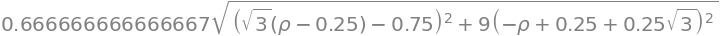

In [8]:
rho = symbols('rho')
expr = 2/3 * sqrt((sqrt(3) * (rho - 0.25) - 0.75)**2 + 9 * (-rho + 0.25 + 0.25 * sqrt(3))**2)
expr